In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('specialistes.csv')

In [69]:
df.head()

,index,Spécialistes,DEPARTEMENT,EFFECTIFS,Hon_sans_depass,Depass,Frais_depl,Tot_hon
0,0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4675796,2548194,0,7223990
1,1,02- Anesthésie-réanimation chirurgicale,02- Aisne,18,5196860,388808,0,5585668
2,2,02- Anesthésie-réanimation chirurgicale,03- Allier,17,4738208,530489,0,5268697
3,5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,108,25614554,11165711,0,36780264
4,6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,21,5613969,798987,0,6412955


In [70]:
#Rename columns
df = df.rename(columns={'HONORAIRES SANS DEPASSEMENT (Euros)': 'Hon_sans_depass','DEPASSEMENTS (Euros)':'Depass','FRAIS DE DEPLACEMENT (Euros)':"Frais_depl", 'TOTAL DES HONORAIRES (Euros)':'Tot_hon'})
df.head()

,index,Spécialistes,DEPARTEMENT,EFFECTIFS,Hon_sans_depass,Depass,Frais_depl,Tot_hon
0,0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4675796,2548194,0,7223990
1,1,02- Anesthésie-réanimation chirurgicale,02- Aisne,18,5196860,388808,0,5585668
2,2,02- Anesthésie-réanimation chirurgicale,03- Allier,17,4738208,530489,0,5268697
3,5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,108,25614554,11165711,0,36780264
4,6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,21,5613969,798987,0,6412955


In [62]:
#remove spaces from strings containing numbers
#remove lines with 0 or nc
#df.Hon_sans_depass=df.Hon_sans_depass.str.replace(" ","")
df=df[df["Hon_sans_depass"].str.contains('nc') == False]
df=df[df["Spécialistes"].str.contains('Total|TOTAL') == False]
df=df[df["DEPARTEMENT"].str.contains('Total|TOTAL') == False]

df["Hon_sans_depass"] = df["Hon_sans_depass"].astype(int)
df["Depass"] = df["Depass"].astype(int)
df["Frais_depl"] = df["Frais_depl"].astype(int)
df["Tot_hon"] = df["Tot_hon"].astype(int)
df=df[df["EFFECTIFS"]!= 0]

#df["Tot_hon"] = df["Tot_hon"].apply(lambda s: float(s))
df.sort_values(by=['EFFECTIFS'], ascending=False)
df = df.drop_duplicates(subset=['DEPARTEMENT','EFFECTIFS','Hon_sans_depass','Depass','Tot_hon']).reset_index()
df.head()

,index,Spécialistes,DEPARTEMENT,EFFECTIFS,Hon_sans_depass,Depass,Frais_depl,Tot_hon
0,0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4675796,2548194,0,7223990
1,1,02- Anesthésie-réanimation chirurgicale,02- Aisne,18,5196860,388808,0,5585668
2,2,02- Anesthésie-réanimation chirurgicale,03- Allier,17,4738208,530489,0,5268697
3,5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,108,25614554,11165711,0,36780264
4,6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,21,5613969,798987,0,6412955


#### Effectif des médecins pour la classe "enfant"

In [102]:
tab_enf=df[df['Spécialistes'].str.contains('PEDIATRIE|Pédiatrie|infantile|de l|enfant')]
tab_enf=tab_enf.groupby('Spécialistes').sum()
tab_enf.append(tab_enf.agg(['sum']))

,index,EFFECTIFS,Hon_sans_depass,Depass,Frais_depl,Tot_hon
12- Pédiatrie,202326,2458,291613760,65119632,13650,356747042
43- Chirurgie infantile,485,11,1144890,1009134,0,2154024
75- Psychiatrie de l'enfant et de l'adolescent,4651,11,512420,459298,0,971718
sum,207462,2480,293271070,66588064,13650,359872784


In [104]:
depassement=tab_enf.Depass>tab_enf.Hon_sans_depass
depassement

Spécialistes
12- Pédiatrie                                     False
43- Chirurgie infantile                           False
75- Psychiatrie de l'enfant et de l'adolescent    False
dtype: bool

In [105]:
sum_enf=tab_enf.agg(['sum'])
sum_enf

,index,EFFECTIFS,Hon_sans_depass,Depass,Frais_depl,Tot_hon
sum,207462,2480,293271070,66588064,13650,359872784


#### Effectif des médecins pour la classe "femme"

In [85]:
tab_fem=df[df['Spécialistes'].str.contains('obstétri|Gynéco')]
tab_fem=tab_fem.groupby('Spécialistes').sum()
tab_fem

,index,EFFECTIFS,Hon_sans_depass,Depass,Frais_depl,Tot_hon
Spécialistes,,,,,,
07- Gynécologie obstétrique,188817,3402,559549788,252616215,720,812166719
70- Gynécologie médicale,58327,869,89091033,34540696,72,123631799
79- Gynécologie obstétrique et gynécologie médicale,17086,135,20123741,10179405,0,30303147


In [86]:
depassement=tab_fem.Depass>tab_fem.Hon_sans_depass
depassement

Spécialistes
07- Gynécologie obstétrique                            False
70- Gynécologie médicale                               False
79- Gynécologie obstétrique et gynécologie médicale    False
dtype: bool

In [106]:
sum_fem=tab_fem.agg(['sum'])
sum_fem

,index,EFFECTIFS,Hon_sans_depass,Depass,Frais_depl,Tot_hon
sum,264230,4406,668764562,297336316,792,966101665


#### Effectif des médecins pour la classe "personne agée"

In [87]:
tab_per_agee=df[df['Spécialistes'].str.contains('Gériatrie|GERIATRIE')]
tab_per_agee=tab_per_agee.groupby('Spécialistes').sum()
tab_per_agee

,index,EFFECTIFS,Hon_sans_depass,Depass,Frais_depl,Tot_hon
Spécialistes,,,,,,
34-Gériatrie,5379,11,299586,512060,8826,820471


In [88]:
depassement=tab_per_agee.Depass>tab_per_agee.Hon_sans_depass
depassement

Spécialistes
34-Gériatrie    True
dtype: bool

In [107]:
sum_per_agee=tab_per_agee.agg(['sum'])
sum_per_agee

,index,EFFECTIFS,Hon_sans_depass,Depass,Frais_depl,Tot_hon
sum,5379,11,299586,512060,8826,820471


In [116]:
#frames=[tab_enf, tab_fem, tab_per_agee]
frames=[sum_enf, sum_fem, sum_per_agee]
recap_class=pd.concat(frames)
index_=["sum_enf", "sum_fem", "sum_per_agee"]
recap_class.index = index_
recap_class

,index,EFFECTIFS,Hon_sans_depass,Depass,Frais_depl,Tot_hon
sum_enf,207462,2480,293271070,66588064,13650,359872784
sum_fem,264230,4406,668764562,297336316,792,966101665
sum_per_agee,5379,11,299586,512060,8826,820471


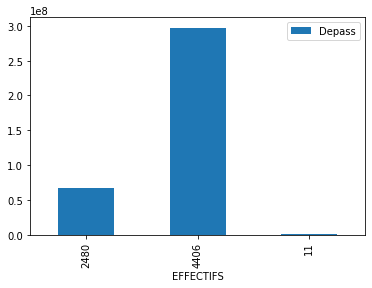

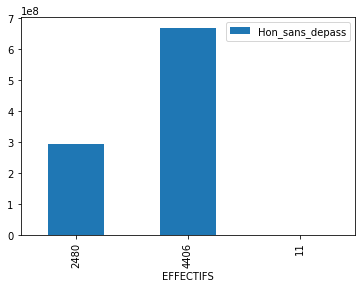

In [124]:
recap_class.plot(kind='bar',x='EFFECTIFS', y='Depass')
recap_class.plot(kind='bar',x='EFFECTIFS', y='Hon_sans_depass')


In [117]:
df.groupby('Spécialistes').sum()

,index,EFFECTIFS,Hon_sans_depass,Depass,Frais_depl,Tot_hon
Spécialistes,,,,,,
02- Anesthésie-réanimation chirurgicale,3672,3468,969889176,272736307,691,1242626166
03- Pathologie cardio-vasculaire,31168,4586,1187167721,54211048,14214,1241392983
04- Chirurgie générale,36226,915,163608691,80517466,2792,244128945
05- Dermato-vénéréologie,101674,2730,356162667,93018248,1718,449182631
06- Radiodiagnostic et imagerie médicale,176365,5299,2504830095,204199193,12362,2709041650
07- Gynécologie obstétrique,188817,3402,559549788,252616215,720,812166719
08- Gastro-entérologie et hépatologie,154455,1832,379087257,60173914,130,439261305
09- Médecine interne,21458,136,10390192,6764904,5623,17160719
10- Neurochirurgie,5966,75,18609000,15071059,4,33680065


In [118]:
df.groupby('DEPARTEMENT').sum()

,index,EFFECTIFS,Hon_sans_depass,Depass,Frais_depl,Tot_hon
DEPARTEMENT,,,,,,
01- Ain,20904,175,47822520,11515902,0,59338421
02- Aisne,29236,237,60531866,4573331,3192,65108388
03- Allier,14678,135,38113928,4056404,5,42170335
04- Alpes-Hte-Provence,315,11,2845277,1150,0,2846427
05- Hautes-Alpes,1672,24,4527164,293419,0,4820583
06- Alpes-Maritimes,76050,1584,314484044,86041821,19109,400544977
07- Ardèche,14192,121,31623125,6960912,0,38584037
08- Ardennes,2302,30,9673032,9542,0,9682574
10- Aube,12647,102,29479105,3873318,14,33352437


In [119]:
len(df)

1160